In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: 读取数据 ===
cbeci_actual = pd.read_excel("/content/drive/MyDrive/energy-hashrate-stat/CBECI.xlsx")
cbeci_predicted = pd.read_excel("/content/drive/MyDrive/energy-hashrate-stat/CBECI_高精度预测_2025年5月20日.xlsx")
hashrate_data = pd.read_excel("/content/drive/MyDrive/energy-hashrate-stat/BTC历史全网算力 - 20250521.xlsx", sheet_name=0)

# === Step 2: 格式化并合并数据 ===
cbeci_actual['date'] = pd.to_datetime(cbeci_actual['date'])
cbeci_predicted['日期'] = pd.to_datetime(cbeci_predicted['日期'])
hashrate_data['date'] = pd.to_datetime(hashrate_data['date'])

cbeci_actual_renamed = cbeci_actual[['date', 'guess_consumption']].rename(columns={'date': '日期', 'guess_consumption': '预测值'})
cbeci_predicted_renamed = cbeci_predicted[['日期', '预测值']]
cbeci_combined = pd.concat([cbeci_actual_renamed, cbeci_predicted_renamed])
cbeci_combined = cbeci_combined[~cbeci_combined.duplicated(subset='日期')]

hashrate_renamed = hashrate_data[['date', 'Unnamed: 1']].rename(columns={'date': '日期', 'Unnamed: 1': '全网算力（EH/s）'})

merged = pd.merge(cbeci_combined, hashrate_renamed, on='日期', how='inner')
merged['预测值_GWh'] = merged['预测值'] * 1000  # TWh -> GWh



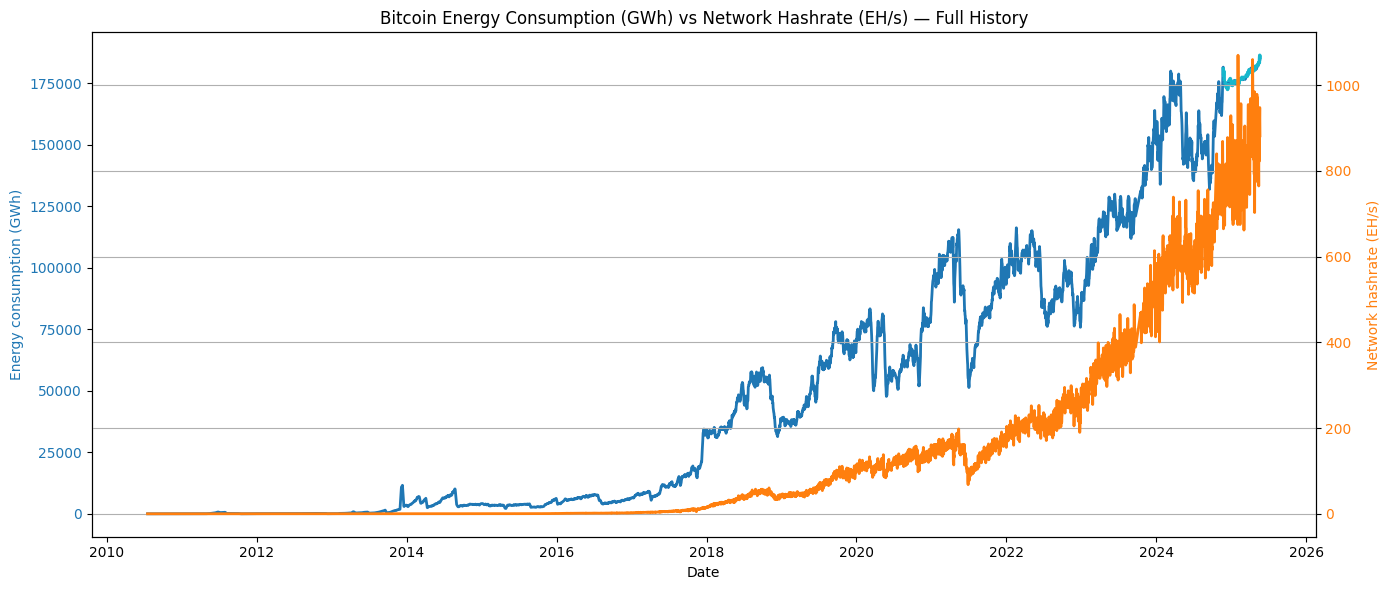

In [2]:
# 预测段起始时间
prediction_start_date = pd.to_datetime("2024-11-22")
predicted_segment_full = merged[merged['日期'] >= prediction_start_date]

# 绘图
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy consumption (GWh)', color='tab:blue')
ax1.plot(merged['日期'], merged['预测值_GWh'], color='tab:blue', linewidth=2, label='Energy consumption (GWh)')
ax1.plot(predicted_segment_full['日期'], predicted_segment_full['预测值_GWh'], linestyle='-.',
         color='tab:cyan', linewidth=2.5, alpha=0.9, label='Predicted energy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 算力右轴
ax2 = ax1.twinx()
ax2.set_ylabel('Network hashrate (EH/s)', color='tab:orange')
ax2.plot(merged['日期'], merged['全网算力（EH/s）'], color='tab:orange', linewidth=2, label='Network hashrate')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 图表美化
plt.title('Bitcoin Energy Consumption (GWh) vs Network Hashrate (EH/s) — Full History')
fig.tight_layout()
plt.grid(True)
plt.show()


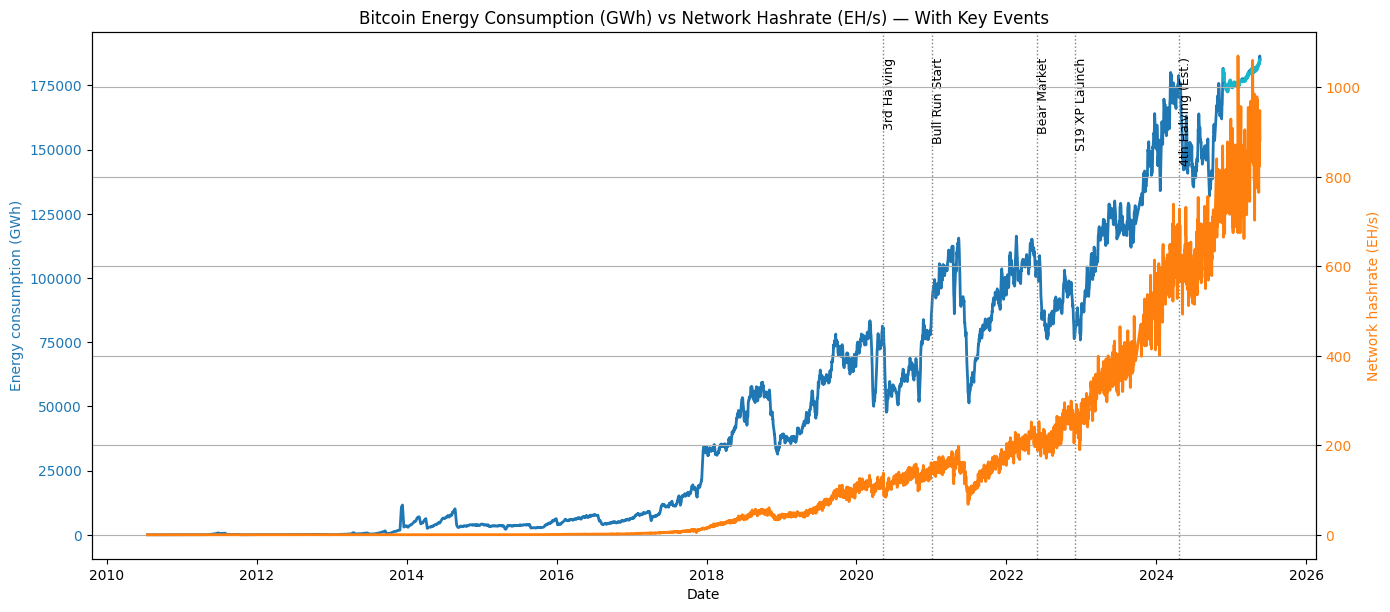

In [3]:
# === Step 3: 虚线部分 ===
prediction_start_date = pd.to_datetime("2024-11-22")
predicted_segment_full = merged[merged['日期'] >= prediction_start_date]

# === Step 4: 绘图 ===
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy consumption (GWh)', color='tab:blue')
ax1.plot(merged['日期'], merged['预测值_GWh'], color='tab:blue', linewidth=2, label='Energy consumption (GWh)')
ax1.plot(predicted_segment_full['日期'], predicted_segment_full['预测值_GWh'],
         linestyle='-.', color='tab:cyan', linewidth=2.5, alpha=0.9, label='Predicted energy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Network hashrate (EH/s)', color='tab:orange')
ax2.plot(merged['日期'], merged['全网算力（EH/s）'], color='tab:orange', linewidth=2, label='Network hashrate')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# === Step 5: 添加关键事件标注 ===
key_events = {
    "2020-05-11": "3rd Halving",
    "2021-01-01": "Bull Run Start",
    "2022-06-01": "Bear Market",
    "2022-12-01": "S19 XP Launch",
    "2024-04-20": "4th Halving (Est.)"
}

for date_str, label in key_events.items():
    date = pd.to_datetime(date_str)
    ax1.axvline(date, color='gray', linestyle=':', linewidth=1)
    ax1.text(date, ax1.get_ylim()[1]*0.95, label, rotation=90, verticalalignment='top',
             fontsize=9, color='black')

# === Step 6: 美化与保存 ===
fig.tight_layout()
plt.title('Bitcoin Energy Consumption (GWh) vs Network Hashrate (EH/s) — With Key Events')
plt.grid(True)
plt.show()


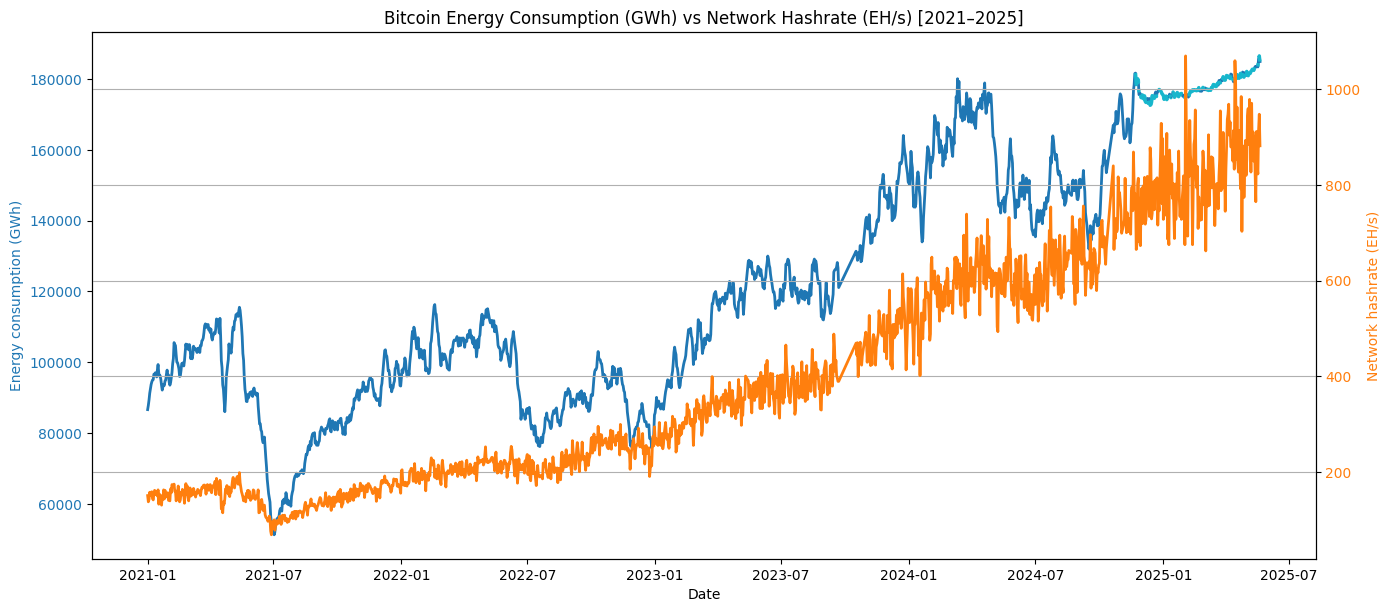

In [5]:
start_date = pd.to_datetime("2021-01-01")
end_date = pd.to_datetime("2025-05-20")
prediction_start_date = pd.to_datetime("2024-11-22")

filtered = merged[(merged['日期'] >= start_date) & (merged['日期'] <= end_date)]
predicted_segment = filtered[filtered['日期'] >= prediction_start_date]

# === Step 4: 绘图 ===
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy consumption (GWh)', color='tab:blue')
ax1.plot(filtered['日期'], filtered['预测值_GWh'], color='tab:blue', linewidth=2, label='Energy consumption (GWh)')
ax1.plot(predicted_segment['日期'], predicted_segment['预测值_GWh'],
         linestyle='-.', color='tab:cyan', linewidth=2.5, alpha=0.9, label='Predicted energy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 第二 Y 轴：全网算力
ax2 = ax1.twinx()
ax2.set_ylabel('Network hashrate (EH/s)', color='tab:orange')
ax2.plot(filtered['日期'], filtered['全网算力（EH/s）'], color='tab:orange', linewidth=2, label='Hashrate')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 图例 & 样式
fig.tight_layout()
plt.title('Bitcoin Energy Consumption (GWh) vs Network Hashrate (EH/s) [2021–2025]')
plt.grid(True)
plt.show()